### Score: `[31]`

Q1. `[10]` Good job!

Q2. `[10+11]` Great job!

各题批注用`### Note`给出，请自行查阅。

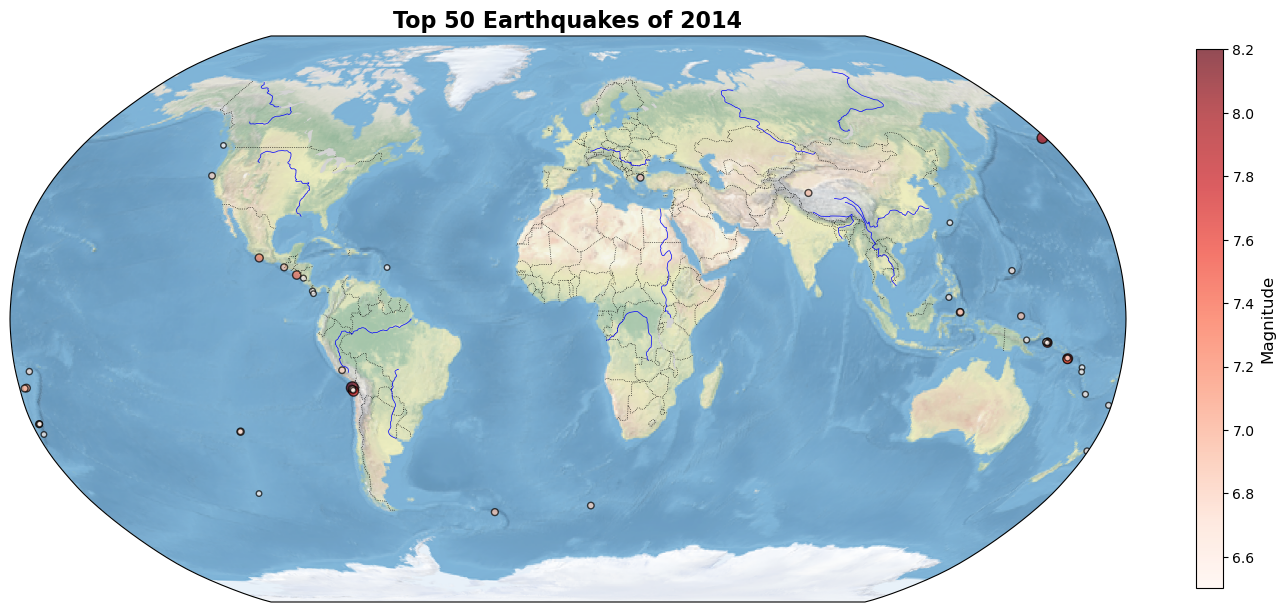

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read data files
file_path = 'usgs_earthquakes.csv'  
data = pd.read_csv(file_path)

# Filter data: take the top 50 highest magnitude earthquakes
top_50_earthquakes = data.nlargest(50, 'mag')

# Extract latitude, longitude and magnitude information
latitudes = top_50_earthquakes['latitude']
longitudes = top_50_earthquakes['longitude']
magnitudes = top_50_earthquakes['mag']


# Mapping
fig = plt.figure(figsize=(18, 10))
ax = plt.axes(projection=ccrs.Robinson()) ### Note: 地图的中心经度可以在这里设置
ax.set_global()

# Add a shadow relief image of the earth as a background
ax.stock_img()  

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgreen', edgecolor='gray', linewidth=0.2)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor='blue')
ax.add_feature(cfeature.LAKES, facecolor='lightgray')

# Mapping locations
scatter = ax.scatter(
    longitudes, latitudes,
    c=magnitudes,   # Use seismic levels as color values
    s=(magnitudes - 4) ** 3,  # Resize the point with a tremor (slightly magnify the effect)
    cmap='Reds',  # Use a red gradient color
    edgecolor='black',
    alpha=0.7,  # Set transparency
    transform=ccrs.PlateCarree()
)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Magnitude', fontsize=12)

# Add title
plt.title('Top 50 Earthquakes of 2014', fontsize=16, fontweight='bold')
plt.show()


In [4]:
#netCDF file：TROPESS Chemical Reanalysis OH Monthly 3-dimensional Product V1 (TRPSCROHM3D)（2018-2021）
'''
https://send.cra.moe/file/QS0XIQZ1qficqnGO/kdUMnIKSoJcGyJIS/TROPESS_reanalysis_mon_oh_2018.nc
https://send.cra.moe/file/QS0XIQZ1qficqnGO/jtNehsccrdQbhvds/TROPESS_reanalysis_mon_oh_2019.nc
https://send.cra.moe/file/QS0XIQZ1qficqnGO/JvNtsyiwn6996YwK/TROPESS_reanalysis_mon_oh_2020.nc
https://send.cra.moe/file/QS0XIQZ1qficqnGO/XxVEyAB7yTrd7CRF/TROPESS_reanalysis_mon_oh_2021.nc
'''


'\nhttps://send.cra.moe/file/QS0XIQZ1qficqnGO/kdUMnIKSoJcGyJIS/TROPESS_reanalysis_mon_oh_2018.nc\nhttps://send.cra.moe/file/QS0XIQZ1qficqnGO/jtNehsccrdQbhvds/TROPESS_reanalysis_mon_oh_2019.nc\nhttps://send.cra.moe/file/QS0XIQZ1qficqnGO/JvNtsyiwn6996YwK/TROPESS_reanalysis_mon_oh_2020.nc\nhttps://send.cra.moe/file/QS0XIQZ1qficqnGO/XxVEyAB7yTrd7CRF/TROPESS_reanalysis_mon_oh_2021.nc\n'

In [5]:
#2.1
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
from mpl_toolkits.mplot3d import Axes3D


# Load the netCDF file
file_path_2018= "D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2018.nc"#Tagret file
file_path_2019= "D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2019.nc"
file_path_2020 ="D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2020.nc"
file_path_2021 ="D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2021.nc"
data_2018 = xr.open_dataset(file_path_2018,decode_times=False)
data_2019 = xr.open_dataset(file_path_2019,decode_times=False)
data_2020 = xr.open_dataset(file_path_2020,decode_times=False)
data_2021 = xr.open_dataset(file_path_2021,decode_times=False)

# Merge data
data_all = xr.concat([data_2018, data_2019, data_2020, data_2021], dim='time')


<>:13: SyntaxWarning: invalid escape sequence '\E'
<>:14: SyntaxWarning: invalid escape sequence '\E'
<>:15: SyntaxWarning: invalid escape sequence '\E'
<>:16: SyntaxWarning: invalid escape sequence '\E'
<>:13: SyntaxWarning: invalid escape sequence '\E'
<>:14: SyntaxWarning: invalid escape sequence '\E'
<>:15: SyntaxWarning: invalid escape sequence '\E'
<>:16: SyntaxWarning: invalid escape sequence '\E'
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_14656\4169141466.py:13: SyntaxWarning: invalid escape sequence '\E'
  file_path_2018= "D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2018.nc"#Tagret file
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_14656\4169141466.py:14: SyntaxWarning: invalid escape sequence '\E'
  file_path_2019= "D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2019.nc"
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_14656\4169141466.py:15: SyntaxWarning: invalid escape sequence '\E'
  file_path_2020 ="D:\Ese5023\Test\Ges\TROPESS_reanalysis_mon_oh_2020.nc"
C:\Users\z

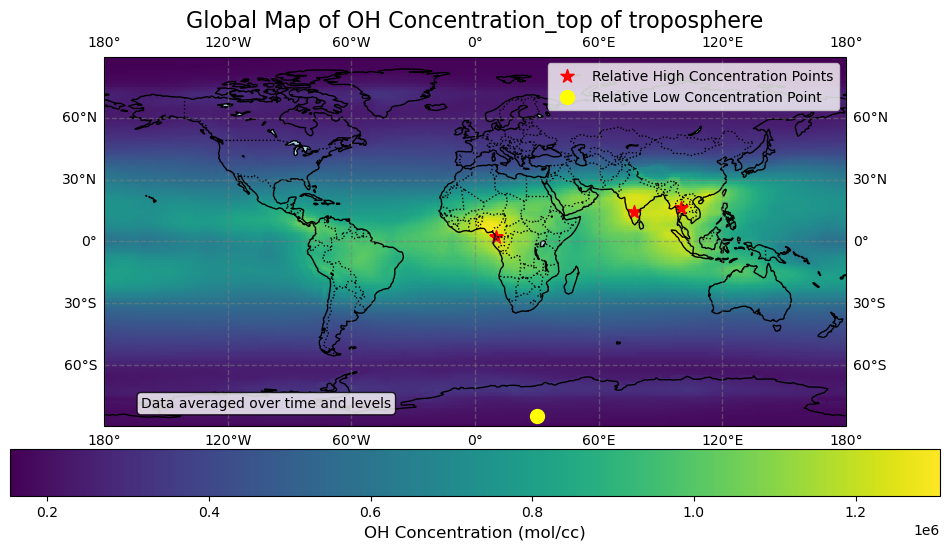

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Select the variable and calculate a global average (mean over time)
# 100 hpa indicates top of troposphere
data = data_all.sel(lev=100)
oh_global = data['oh'].mean(dim=['time'])

# Create the figure with a defined projection
fig, ax = plt.subplots(
    figsize=(12, 6),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

# Plot the data using pcolormesh with appropriate colormap and normalization
cmap = plt.cm.viridis  # Choose a colormap
vmin, vmax = np.nanmin(oh_global), np.nanmax(oh_global)
img = ax.pcolormesh(
    data_all['lon'], data_all['lat'], oh_global,
    cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree()
)

# Add features such as coastline, borders, land, and lakes
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black')

# Add gridlines with labels
ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--', alpha=0.5)

# Add title, labels, and ticks
ax.set_title("Global Map of OH Concentration_top of troposphere", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a colorbar with a label
cbar = plt.colorbar(img, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("OH Concentration (mol/cc)", fontsize=12)

# Add annotations and text box
ax.text(
    0.05, 0.05, "Data averaged over time and levels", 
    transform=ax.transAxes, fontsize=10, 
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# High concentration points (red pentagrams)
ax.scatter(
    77.1, 14, color='red', s=100, marker='*', transform=ccrs.PlateCarree(), label='Relative High Concentration Points'
)
ax.scatter(
    10, 2, color='red', s=100, marker='*', transform=ccrs.PlateCarree()
)
ax.scatter(
    100, 16, color='red', s=100, marker='*', transform=ccrs.PlateCarree()
)

# Low concentration points (yellow circles)
ax.scatter(
    30, -85, color='yellow', s=100, marker='o', transform=ccrs.PlateCarree(), label='Relative Low Concentration Point'
)

# Add legend
ax.legend()
plt.show()


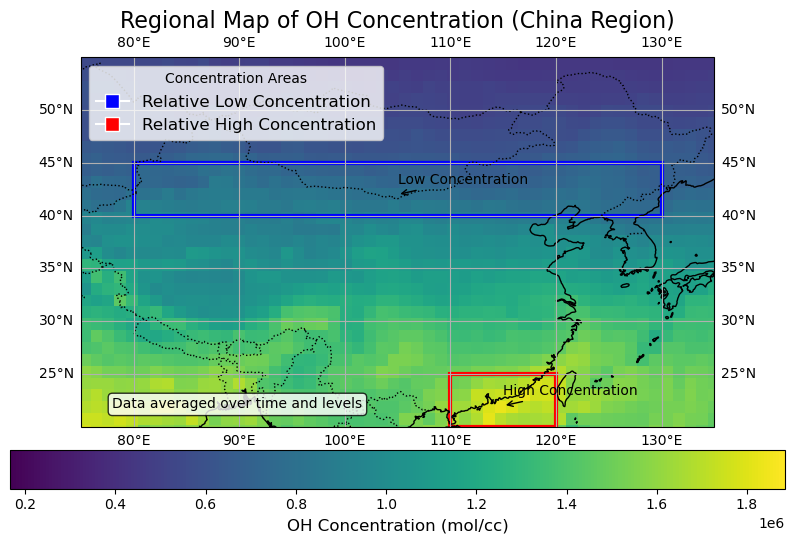

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D  # Import Line2D for creating custom legends

# Select the variable and calculate a regional average (e.g., over time and pressure levels)
oh_region = data_all['oh'].mean(dim=['time', 'lev'])

# Define the region (focusing on latitudes between 20 and 55, longitudes between 75 and 135 for China)
lat_min, lat_max = 20, 55
lon_min, lon_max = 75, 135

# Create the figure
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={"projection": ccrs.PlateCarree()}  # Use PlateCarree projection for latitude/longitude
)

# Plot the data
cmap = plt.cm.viridis  # Choose a colormap
vmin, vmax = np.nanmin(oh_region), np.nanmax(oh_region)
img = ax.pcolormesh(
    data_all['lon'], data_all['lat'], oh_region,
    cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree()
)

# Add features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgrey')

# Zoom into the selected region
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add gridlines and labels
ax.gridlines(draw_labels=True)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add title
ax.set_title("Regional Map of OH Concentration (China Region)", fontsize=16)

# Add a colorbar with a label
cbar = plt.colorbar(img, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("OH Concentration (mol/cc)", fontsize=12)

# Add text box
ax.text(
    0.05, 0.05, "Data averaged over time and levels",
    transform=ax.transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# Low concentration area: 40N-45N, 80E-130E
low_conc_box = patches.Rectangle(
    (80, 40), 50, 5, linewidth=3, edgecolor='blue', facecolor='none', linestyle='-'  # Solid line, thicker border
)

# High concentration area: 20N-25N, 110E-120E
high_conc_box = patches.Rectangle(
    (110, 20), 10, 5, linewidth=3, edgecolor='red', facecolor='none', linestyle='-'  # Solid line, thicker border
)

# Add boxes to the map using PlateCarree projection
ax.add_patch(low_conc_box)
ax.add_patch(high_conc_box)

# Add annotations for these points
ax.annotate(
    "Low Concentration", xy=(105, 42), xytext=(105, 43), 
    arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10, transform=ccrs.PlateCarree()
)
ax.annotate(
    "High Concentration", xy=(115, 22), xytext=(115, 23), 
    arrowprops=dict(facecolor='red', arrowstyle="->"), fontsize=10, transform=ccrs.PlateCarree()
)

# Create custom legend handles for the low and high concentration areas
legend_handles = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, label='Relative Low Concentration'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='Relative High Concentration')
]

# Add legend to the plot
ax.legend(handles=legend_handles, loc='upper left', fontsize=12, title="Concentration Areas")

# Show the plot
plt.show()
